<a href="https://colab.research.google.com/github/papermashea/codesignwtm/blob/main/StableDiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install Requirements

!pip install diffusers==0.4.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
#@title Token Login

from huggingface_hub import notebook_login
notebook_login()

In [ ]:
#@title Load Stable Diffusion

import torch
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", revision="fp16", torch_dtype=torch.float16)  
pipe = pipe.to("cuda")

In [ ]:
#@title Generate Image


prompt = "" #@param {type: "string"}
width = 512 #@param {type: "integer"}
height = 720 #@param {type: "integer"}
steps = 50 #@param {type: "integer"}

image = pipe(prompt, num_inference_steps=steps, height=height, width=width).images[0]  
image.save(f"{prompt}.png")
image

In [ ]:
#@title Preserve Image

prompt = "" #@param {type: "string"}
seed = 556 #@param {type: "integer"}
width = 512 #@param {type: "integer"}
height = 720 #@param {type: "integer"}
steps = 50 #@param {type: "integer"}

import torch

generator = torch.Generator("cuda").manual_seed(seed)
image = pipe(prompt, num_inference_steps=steps, generator=generator, height=height, width=width).images[0]
image.save(f"{prompt}.png")
image

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

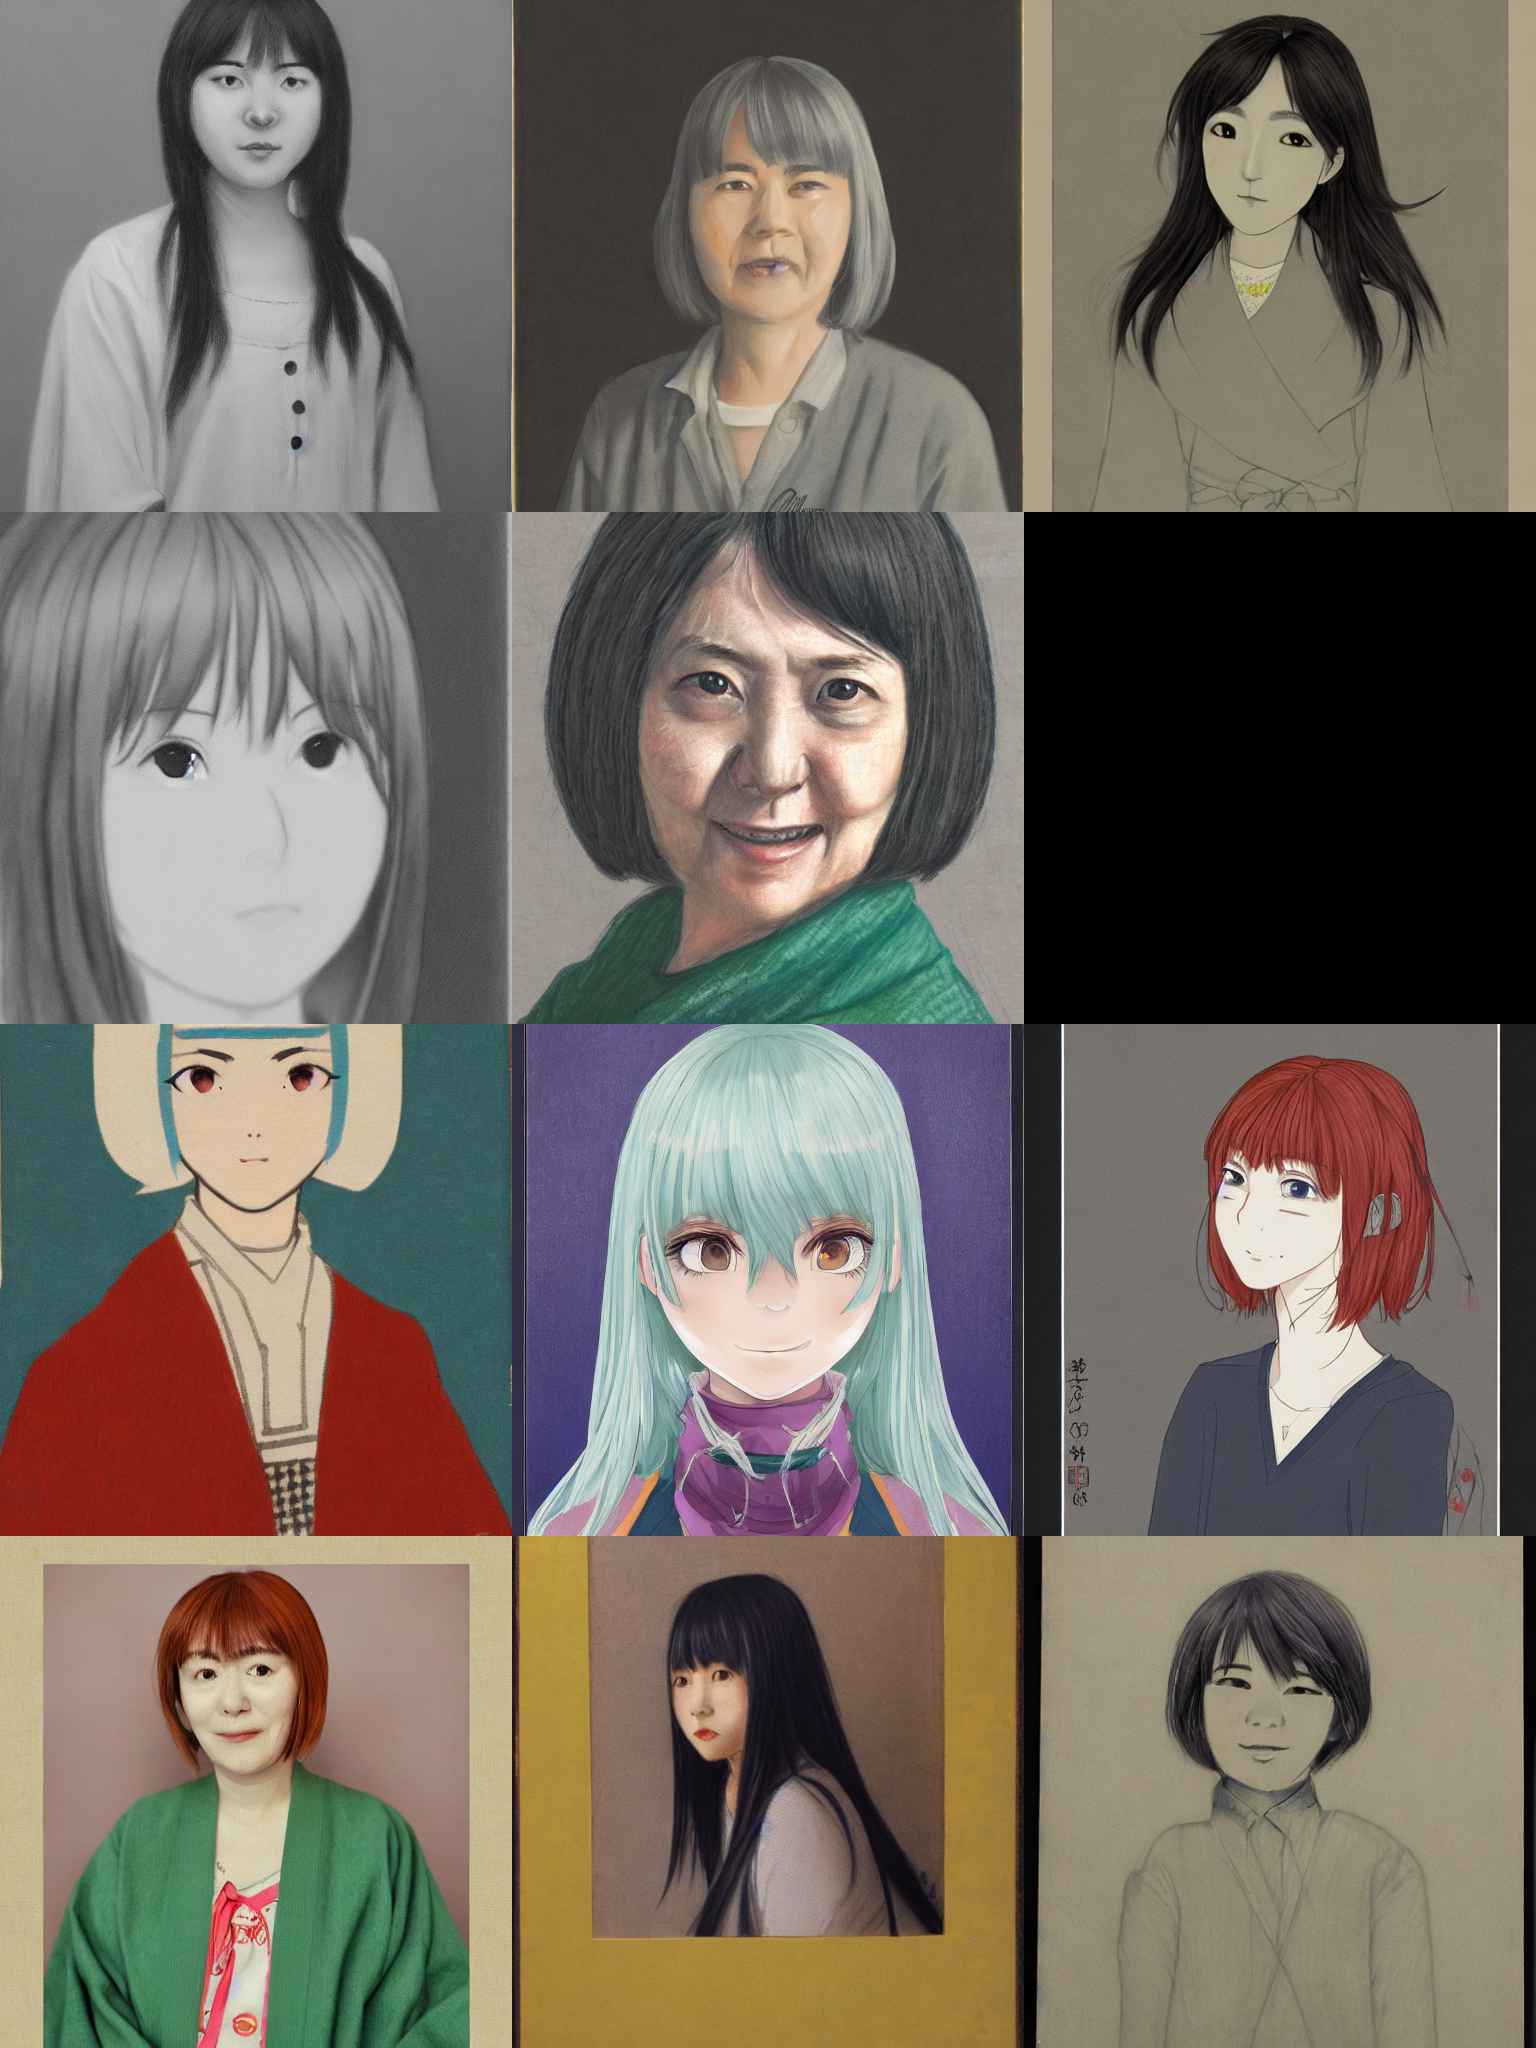

In [ ]:
#@title Genearte Image Grid

from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid


prompt = "" #@param {type: "string"}
num_cols = 3 #@param {type: "integer"}
num_rows = 4 #@param {type: "integer"}

prompt = [prompt] * num_cols

all_images = []
for i in range(num_rows):
  images = pipe(prompt).images
  all_images.extend(images)

grid = image_grid(all_images, rows=num_rows, cols=num_cols)
grid

In [ ]:
#@title Generate from image
from diffusers import StableDiffusionImg2ImgPipeline
import requests
from io import BytesIO
from PIL import Image
import torch
from torch import autocast
from tqdm.auto import tqdm
from typing import List, Optional, Union


device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "" #@param {type: "string"}
seed = 32 #@param {type: "integer"}
width = 512 #@param {type: "integer"}
height = 512 #@param {type: "integer"}
steps = 50 #@param {type: "integer"}
strength = 0.5 #@param {type:"number"}

#@markdown initial image
url = "" #@param {type: "string"}
init_img = Image.open(url) 
init_img = init_img.resize((width, height))
 
generator = torch.Generator("cuda").manual_seed(seed)
with autocast("cuda"):
    image = pipe(prompt=prompt, init_image=init_img, strength=strength, guidance_scale=7.5, generator=generator).images[0]
image.save(f"{prompt}.png")
image